In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
import graphviz
from skimage import io
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Some code from lab sheets

In [2]:
dataset = fetch_california_housing()
#
X = np.array(dataset['data'])
y = np.array(dataset['target'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [3]:
# write your code here
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Training set accuracy: {}".format(regressor.score(X_train, y_train)))
print("Test set accuracy: {}".format(regressor.score(X_test, y_test)))
print(f'RMSE = {rmse}')

Training set accuracy: 1.0
Test set accuracy: 0.6398164244654199
RMSE = 0.6994876558124954


In [4]:
# Regularize the decision tree by limiting the maximum depth
regressor2 = DecisionTreeRegressor(max_depth=3)
regressor2.fit(X_train, y_train)

print("Training set accuracy: {}".format(regressor2.score(X_train, y_train)))
print("Test set accuracy: {}".format(regressor2.score(X_test, y_test)))

Training set accuracy: 0.5347314958807041
Test set accuracy: 0.5195408044109457


In [5]:

hyper_params = [{'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 20],
                 'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 20],
                 'min_samples_leaf' : [1, 3, 5, 7, 9, 11, 13, 15, 20]
                 }]

regressor = DecisionTreeRegressor()
regressor_grid = GridSearchCV(regressor, hyper_params, cv= 3)
regressor_grid.fit(X_train, y_train)

print('Best hyperparameters:', regressor_grid.best_params_)
print('Test score:', regressor_grid.score(X_test, y_test))

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 20, 'min_samples_split': 15}
Test score: 0.7469826024292674


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
243 fits failed out of a total of 2187.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1342, in fit
    super().fit(
  File "/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 265, in fit
    check_scalar(
  File "/Users/emiljino/.local/lib/python3.9/sit

In [14]:
print("Training set accuracy: {}".format(regressor_grid.score(X_train, y_train)))
print("Test set accuracy: {}".format(regressor_grid.score(X_test, y_test)))

Training set accuracy: 0.8199284692631424
Test set accuracy: 0.7469826024292674


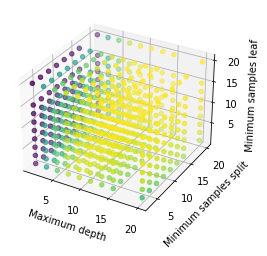

In [7]:
scores = regressor_grid.cv_results_['mean_test_score']

max_depth = regressor_grid.cv_results_['param_max_depth'].data
min_samples_split = regressor_grid.cv_results_['param_min_samples_split'].data
min_samples_leaf = regressor_grid.cv_results_['param_min_samples_leaf'].data

# Create a 3D scatter plot to visualize the relationship between the
# hyperparameters and the model's performance
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(max_depth, min_samples_split, min_samples_leaf, c=scores)
ax.set_xlabel('Maximum depth')
ax.set_ylabel('Minimum samples split')
ax.set_zlabel('Minimum samples leaf')
plt.show()

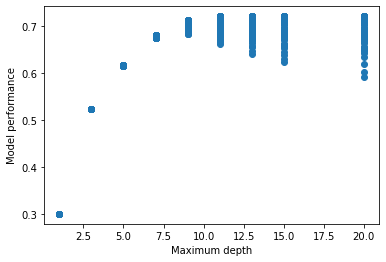

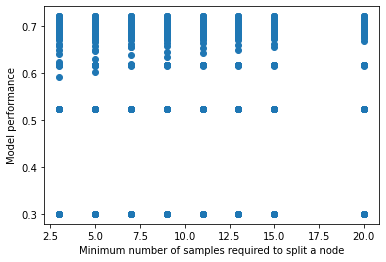

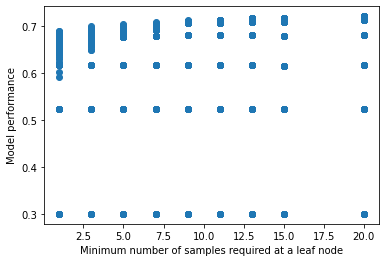

In [8]:
# Extract the best scores and hyperparameters from the grid search
scores = regressor_grid.cv_results_['mean_test_score']
max_depth = [params['max_depth'] for params in regressor_grid.cv_results_['params']]
min_samples_split = [params['min_samples_split'] for params in regressor_grid.cv_results_['params']]
min_samples_leaf = [params['min_samples_leaf'] for params in regressor_grid.cv_results_['params']]

# Plot the relationship between the maximum depth and the model's performance
plt.scatter(max_depth, scores)
plt.xlabel('Maximum depth')
plt.ylabel('Model performance')
plt.show()

# Plot the relationship between the minimum number of samples required to split a node and the model's performance
plt.scatter(min_samples_split, scores)
plt.xlabel('Minimum number of samples required to split a node')
plt.ylabel('Model performance')
plt.show()

# Plot the relationship between the minimum number of samples required at a leaf node and the model's performance
plt.scatter(min_samples_leaf, scores)
plt.xlabel('Minimum number of samples required at a leaf node')
plt.ylabel('Model performance')
plt.show()

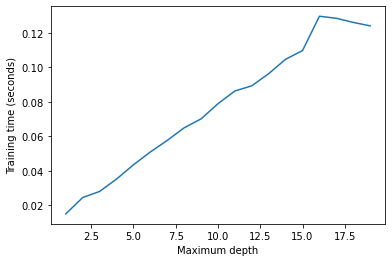

In [9]:
# Create an array of maximum depths to evaluate
max_depths = np.arange(1, 20)

# Create an array to store the training times for each maximum depth
train_times = np.zeros(max_depths.shape)

# Train a decision tree with each maximum depth
for i, max_depth in enumerate(max_depths):
    # Create a decision tree regressor with the given maximum depth
    regressor = DecisionTreeRegressor(max_depth=max_depth)

    # Record the start time
    start_time = time.perf_counter()

    # Train the model on the training set
    regressor.fit(X_train, y_train)

    # Record the end time
    end_time = time.perf_counter()

    # Store the training time for this maximum depth
    train_times[i] = end_time - start_time

# Plot the relationship between the maximum depth and the training time
plt.plot(max_depths, train_times)
plt.xlabel('Maximum depth')
plt.ylabel('Training time (seconds)')
plt.show()


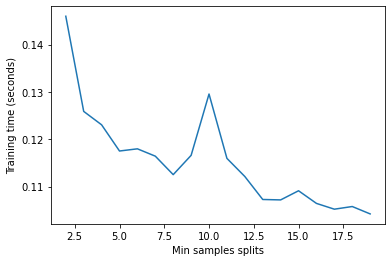

In [10]:
# Create an array of min samples split to evaluate
min_samples_splits = np.arange(2, 20)

# Create an array to store the training times for each min samples split
train_times = np.zeros(min_samples_splits.shape)

# Train a decision tree with each min samples split
for i, min_samples_split in enumerate(min_samples_splits):
    # Create a decision tree regressor with the given min samples split
    regressor = DecisionTreeRegressor(min_samples_split=min_samples_split)

    # Record the start time
    start_time = time.perf_counter()

    # Train the model on the training set
    regressor.fit(X_train, y_train)

    # Record the end time
    end_time = time.perf_counter()

    # Store the training time for this min samples split
    train_times[i] = end_time - start_time

# Plot the relationship between the min samples split and the training time
plt.plot(min_samples_splits, train_times)
plt.xlabel('Min samples splits')
plt.ylabel('Training time (seconds)')
plt.show()


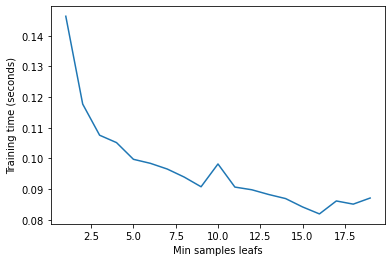

In [11]:
# Create an array of min samples leaf to evaluate
min_samples_leafs = np.arange(1, 20)

# Create an array to store the training times for each min samples leaf 
train_times = np.zeros(min_samples_leafs.shape)

# Train a decision tree with each min samples leaf 
for i, min_samples_leaf in enumerate(min_samples_leafs):
    # Create a decision tree regressor with the given min samples leaf 
    regressor = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)

    # Record the start time
    start_time = time.perf_counter()

    # Train the model on the training set
    regressor.fit(X_train, y_train)

    # Record the end time
    end_time = time.perf_counter()

    # Store the training time for this min samples leaf 
    train_times[i] = end_time - start_time

# Plot the relationship between the min samples leaf  and the training time
plt.plot(min_samples_leafs, train_times)
plt.xlabel('Min samples leafs')
plt.ylabel('Training time (seconds)')
plt.show()


In [12]:
start = time.time()

best_regressor = DecisionTreeRegressor(max_depth = 20, min_samples_split = 15, min_samples_leaf = 20)

best_regressor.fit(X_train, y_train)

end = time.time()

elapsed_time = end-start
print("Total training time: {:.2f} seconds".format(elapsed_time))

y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Training set accuracy: {}".format(best_regressor.score(X_train, y_train)))
print("Test set accuracy: {}".format(best_regressor.score(X_test, y_test)))
print(f'RMSE = {rmse}')

Total training time: 0.09 seconds
Training set accuracy: 0.8199284692631424
Test set accuracy: 0.7469826024292674
RMSE = 0.5851617483665587


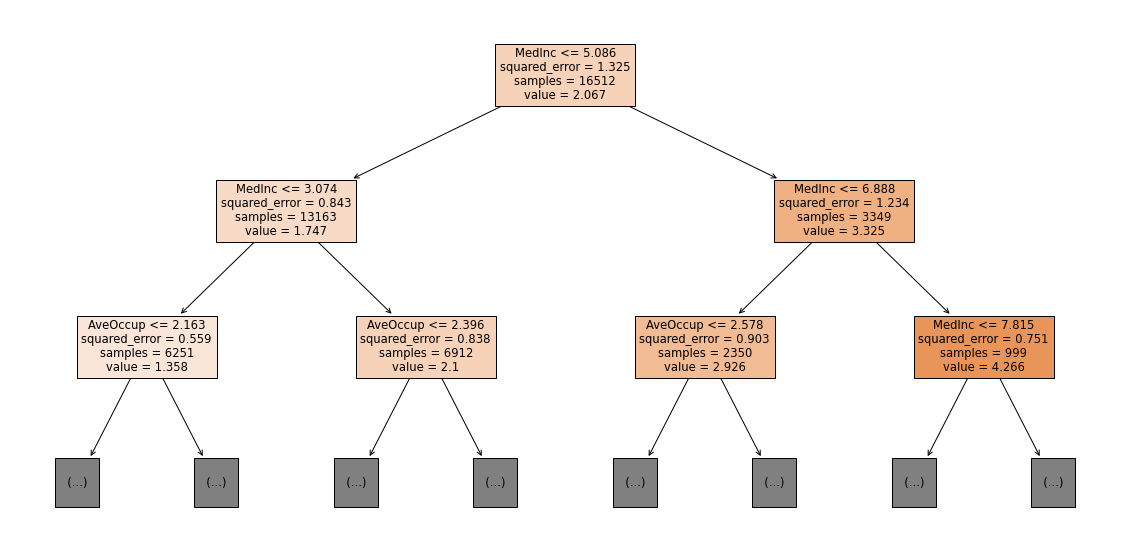

In [17]:
fig = plt.figure(figsize=(20, 10))
#plot_tree(best_regressor, max_depth=2, filled=True)
plot_tree(best_regressor, max_depth=2, feature_names=dataset.feature_names, class_names=dataset.target_names, filled=True)
plt.show()